# Bar Plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymssql

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 데이터 준비

In [8]:
sql_query = '''SELECT C.CustomerID, Title, FirstName, LastName, CompanyName, ShipMethod, UnitPrice, P.Name as ProductName, ProductNumber, Color, PC.Name AS CategoryName
FROM SalesLT.Customer AS C INNER JOIN SalesLT.SalesOrderHeader AS O ON C.CustomerID = O.CustomerID
	INNER JOIN SalesLT.SalesOrderDetail AS D ON O.SalesOrderID = D.SalesOrderID
	INNER JOIN SalesLT.Product AS P ON D.ProductID = P.ProductID
	INNER JOIN SalesLT.ProductCategory AS PC ON P.ProductCategoryID = PC.ProductCategoryID'''

conn = pymssql.connect(
    server='localhost',
    user='sa',
    password='kogpsd1!',
    database='AdventureWorksLT2022',
)

try:
    df = pd.read_sql(sql_query, conn)
except Exception as e:
    print(e)
finally:
    conn.close()

df.head(5)

C:\Users\gik_k\AppData\Local\Temp\ipykernel_23084\1546932419.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,CustomerID,Title,FirstName,LastName,CompanyName,ShipMethod,UnitPrice,ProductName,ProductNumber,Color,CategoryName
0,29847,Mr.,David,Hodgson,Good Toys,CARGO TRANSPORT 5,356.898,"ML Road Frame-W - Yellow, 48",FR-R72Y-48,Yellow,Road Frames
1,29847,Mr.,David,Hodgson,Good Toys,CARGO TRANSPORT 5,356.898,"ML Road Frame-W - Yellow, 38",FR-R72Y-38,Yellow,Road Frames
2,30072,Ms.,Andrea,Thomsen,West Side Mart,CARGO TRANSPORT 5,63.900,Rear Brakes,RB-9231,Silver,Brakes
3,30113,Mr.,Raja,Venugopal,Nearby Cycle Shop,CARGO TRANSPORT 5,218.454,"ML Mountain Frame-W - Silver, 42",FR-M63S-42,Silver,Mountain Frames
4,30113,Mr.,Raja,Venugopal,Nearby Cycle Shop,CARGO TRANSPORT 5,461.694,"Mountain-400-W Silver, 46",BK-M38S-46,Silver,Mountain Bikes


## 성별 판매량

In [24]:
df_by_title = df[['Title','UnitPrice']].groupby('Title').sum()
df_by_title

,UnitPrice
Title,
Mr.,151327.0185
Ms.,56156.9802
Sra.,31.5840


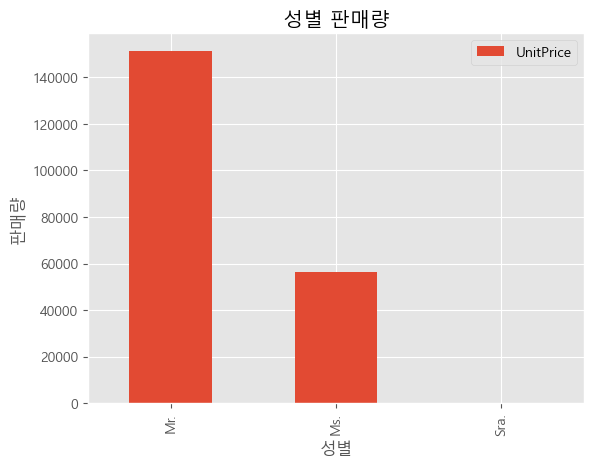

In [42]:
# 성별 판매량
plt.style.use('ggplot')

df_by_title.plot(kind='bar')

plt.title('성별 판매량')
plt.xlabel('성별')
plt.ylabel('판매량')

plt.show()

## 이름별 판매량

In [56]:
df_by_name = df[['Title','UnitPrice']]
df_by_name['name'] = df['FirstName'] + " " + df['LastName']
df_by_name.drop('Title',axis=1, inplace=True)
df_by_name = df_by_name.groupby('name').sum()
df_by_name

C:\Users\gikpreet\AppData\Local\Temp\ipykernel_13380\3438476958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_name['name'] = df['FirstName'] + " " + df['LastName']
C:\Users\gikpreet\AppData\Local\Temp\ipykernel_13380\3438476958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_name.drop('Title',axis=1, inplace=True)


,UnitPrice
name,
Andrea Thomsen,63.9000
Anthony Chor,14016.5940
Brigid Cavendish,858.9000
Catherine Abel,17880.1080
Christopher Beck,17251.3920
Cory Booth,2400.0842
David Hodgson,713.7960
Donald Blanton,1680.5880
Frank Campbell,13564.0380


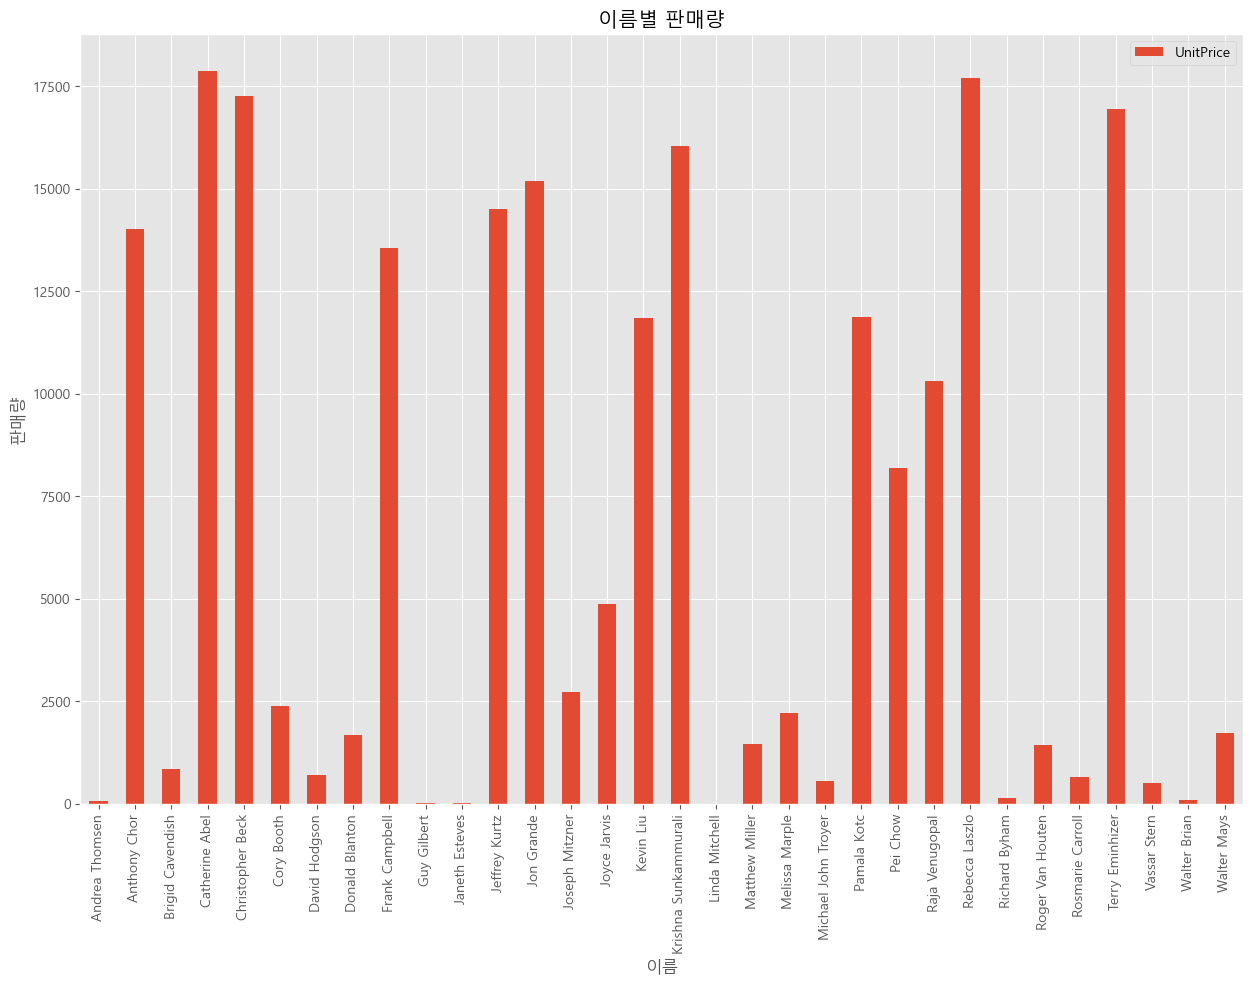

In [ ]:
# 이름별 판매량
plt.style.use('ggplot')

df_by_name.plot(kind='bar',figsize=(15, 10))

plt.title('이름별 판매량')
plt.xlabel('이름')
plt.ylabel('판매량')

plt.show()

In [55]:
df_by_company = df[['CompanyName','UnitPrice']]
df_by_company = df_by_company.groupby('CompanyName').sum()
df_by_company

,UnitPrice
CompanyName,
Action Bicycle Specialists,16934.8390
Aerobic Exercise Company,669.3720
Bulk Discount Store,17251.3920
Central Bicycle Specialists,31.5840
Channel Outlet,142.4940
Closest Bicycle Store,11884.3482
Coalition Bike Company,1680.5880
Discount Tours,2207.9760
Eastside Department Store,11846.2578


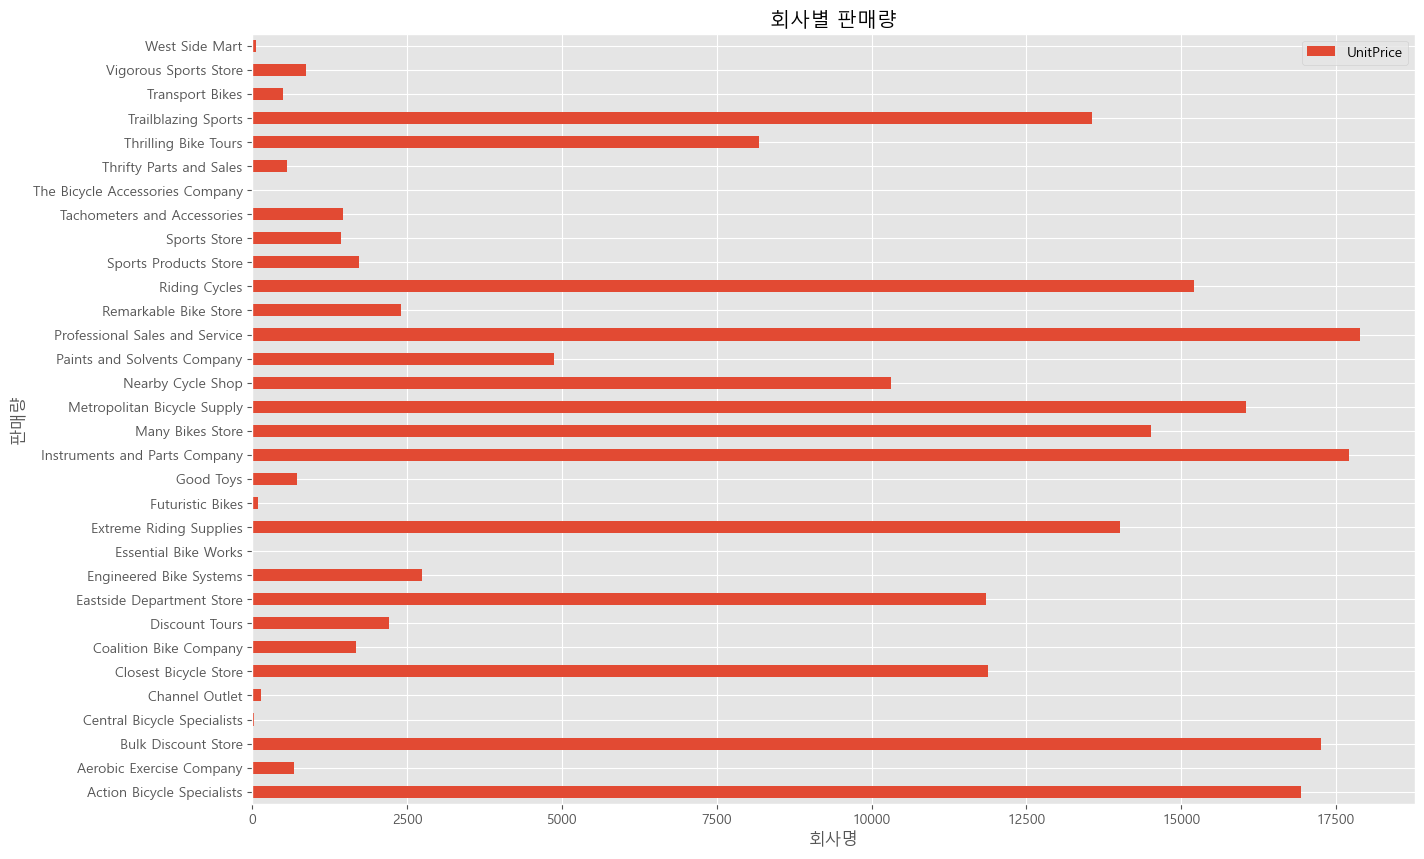

In [63]:
# 성별 판매량
plt.style.use('ggplot')

df_by_company.plot(kind='barh',figsize=(15, 10))

plt.title('회사별 판매량')
plt.xlabel('회사명')
plt.ylabel('판매량')

plt.show()